## 데이터 분석


In [33]:
import pandas as pd

train_df = pd.read_csv("./data/rainfall_train.csv")
test_df = pd.read_csv("./data/rainfall_test.csv")


In [34]:
train_df.groupby(by=['rainfall_train.ef_year'])['rainfall_train.dh'].count()

rainfall_train.ef_year
A    488969
B    479711
C    488572
Name: rainfall_train.dh, dtype: int64

In [35]:
train_df['rainfall_train.ef_month'].value_counts()

rainfall_train.ef_month
7     297330
8     297205
6     287887
9     287176
5     237309
10     50345
Name: count, dtype: int64

### 무강수 데이터 월별 분포 보기

In [45]:
#결측치 제거 8490개
rainfall_train= rainfall_train[rainfall_train['rainfall_train.class_interval'] != -999]
#결측치 제거된 데이터 개수 1457252 : 1223315
non_rainfall=rainfall_train[rainfall_train['rainfall_train.class_interval'] == 0]

array([[<Axes: title={'center': 'rainfall_train.ef_month'}>]],
      dtype=object)

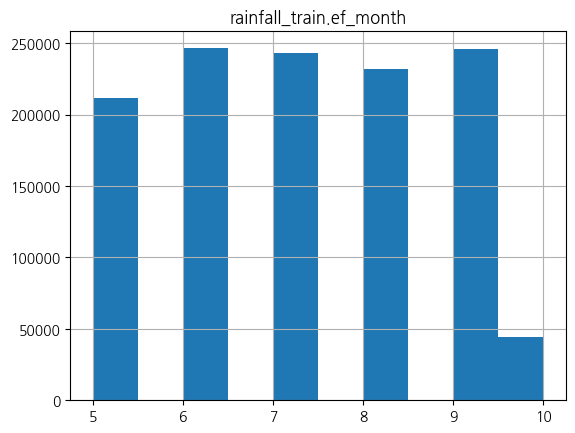

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

non_rainfall.hist(column=['rainfall_train.ef_month'])

<Axes: xlabel='rainfall_train.ef_hour'>

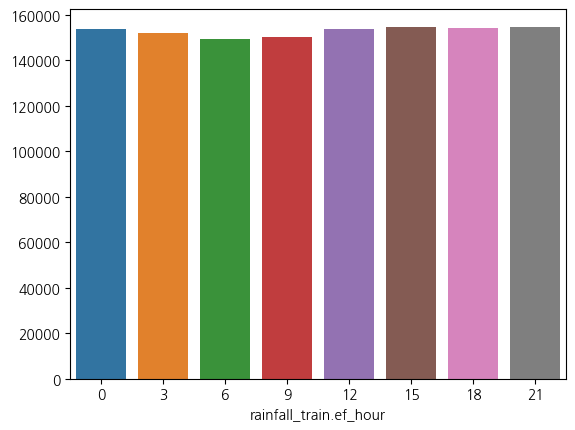

In [47]:
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(8))
x = non_rainfall.groupby(by=['rainfall_train.ef_hour'])['rainfall_train.v01'].count().index
y = non_rainfall.groupby(by=['rainfall_train.ef_hour'])['rainfall_train.v01'].count().values

sns.barplot(x=x,y=y)


Text(0.5, 1.0, '지점별 무강수 데이터 분포')

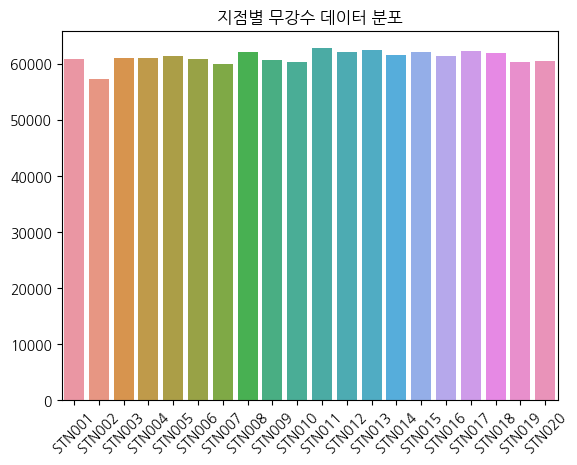

In [48]:
# rainfall_train['rainfall_train.stn4contest']
tmp = non_rainfall.groupby(by=['rainfall_train.stn4contest'])['rainfall_train.fc_hour'].count()
x = tmp.index.values
y = tmp.values
plt.rcParams['font.family'] = "NanumGothic"
sns.barplot(x=x,y=y)
plt.xticks(rotation=45)
plt.title("지점별 무강수 데이터 분포")

array([[<Axes: title={'center': 'rainfall_train.ef_day'}>]], dtype=object)

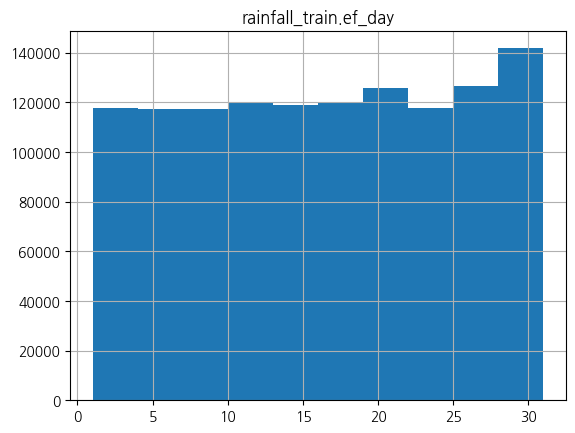

In [49]:
non_rainfall.hist(column=['rainfall_train.ef_day'])

/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_8887/951082933.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(np.arange(20))
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

Text(0.5, 0.98, '지점별 강수 데이터 분포')

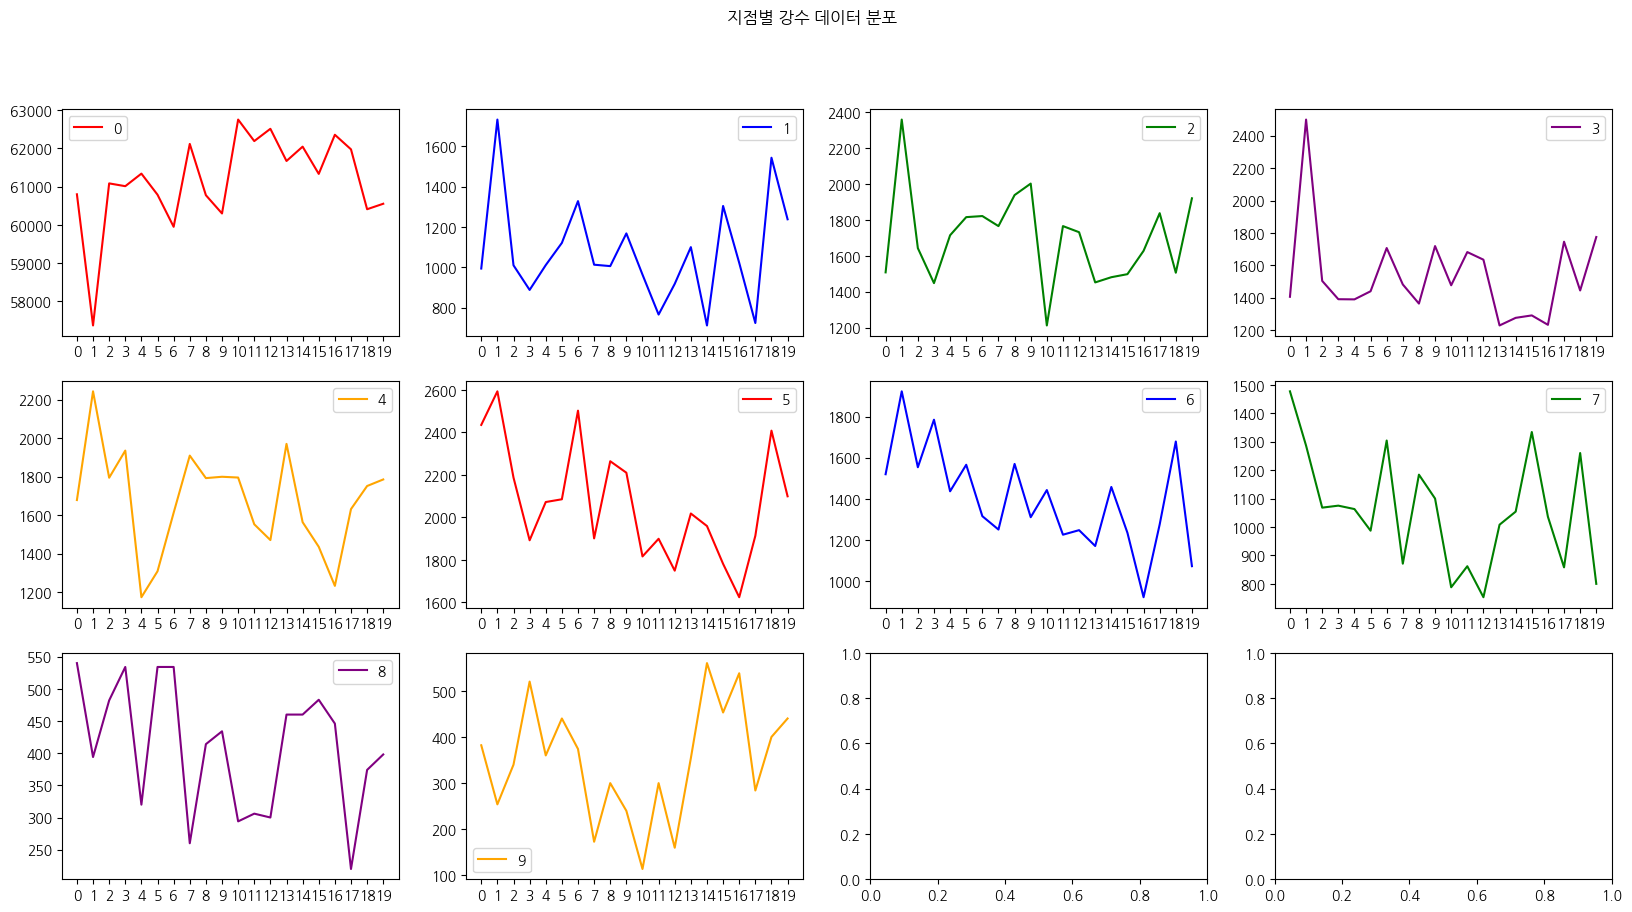

In [50]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i][['rainfall_train.stn4contest']].value_counts().sort_index()
    sns.lineplot(x= np.array([i[0]for i in tmp.index.values]),y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(np.arange(20))

fig.suptitle("지점별 강수 데이터 분포")

Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')


Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')

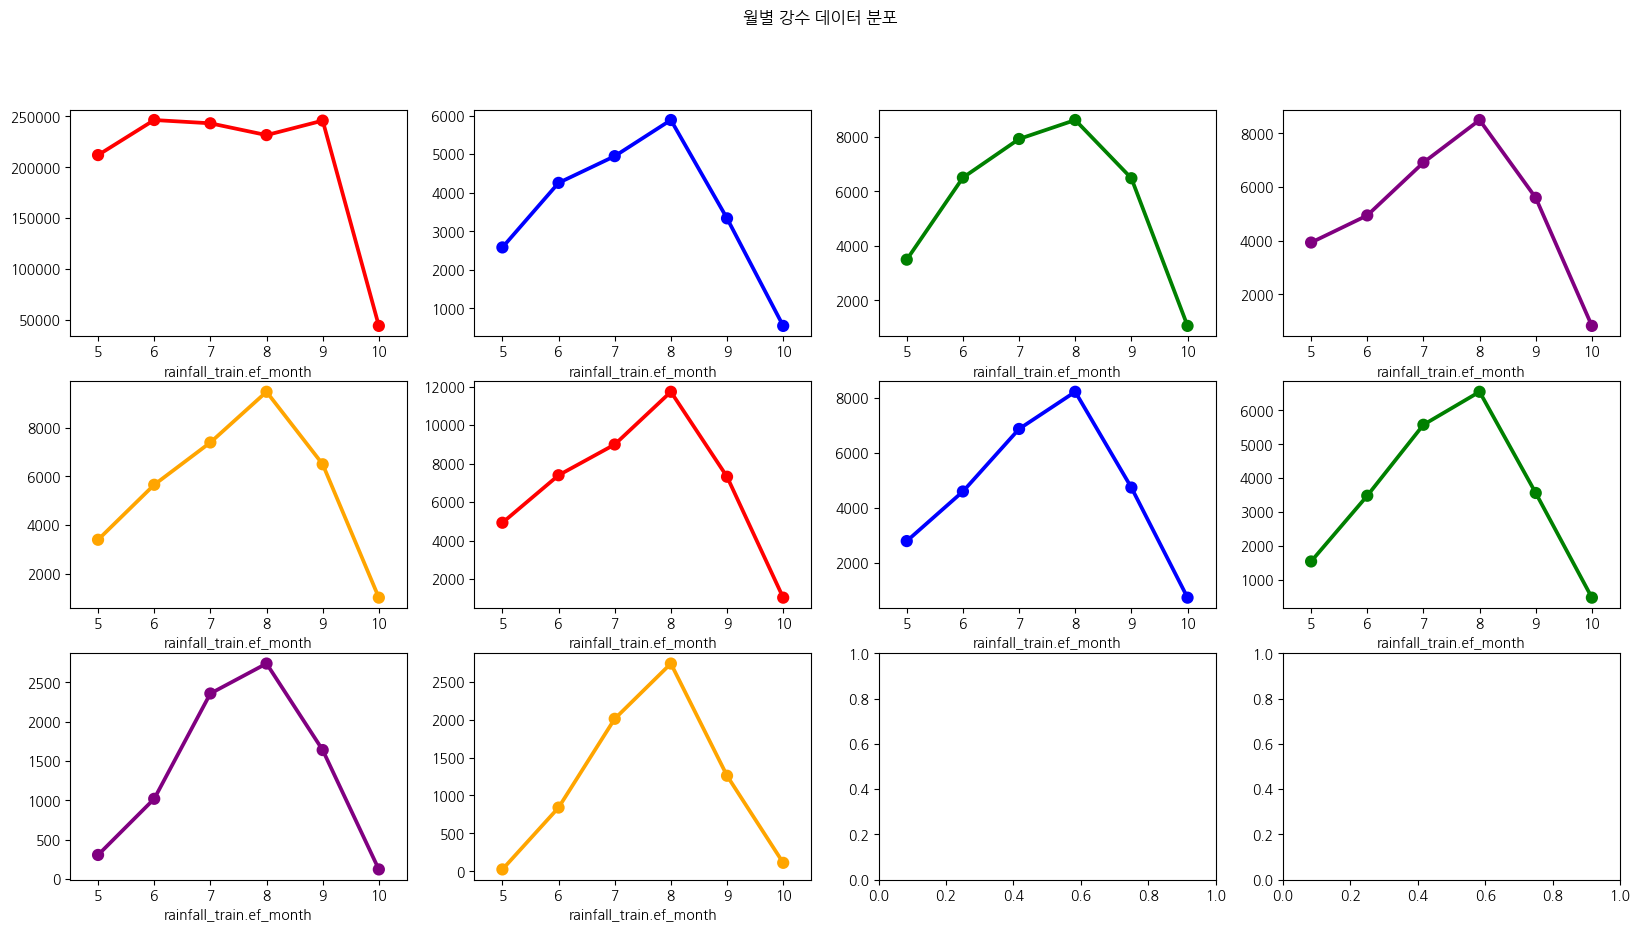

In [51]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_month'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(tmp.index)
    print(tmp.index)
fig.suptitle("월별 강수 데이터 분포")
tmp.index

Index([0, 3, 6, 9, 12, 15, 18, 21], dtype='int64', name='rainfall_train.ef_hour')

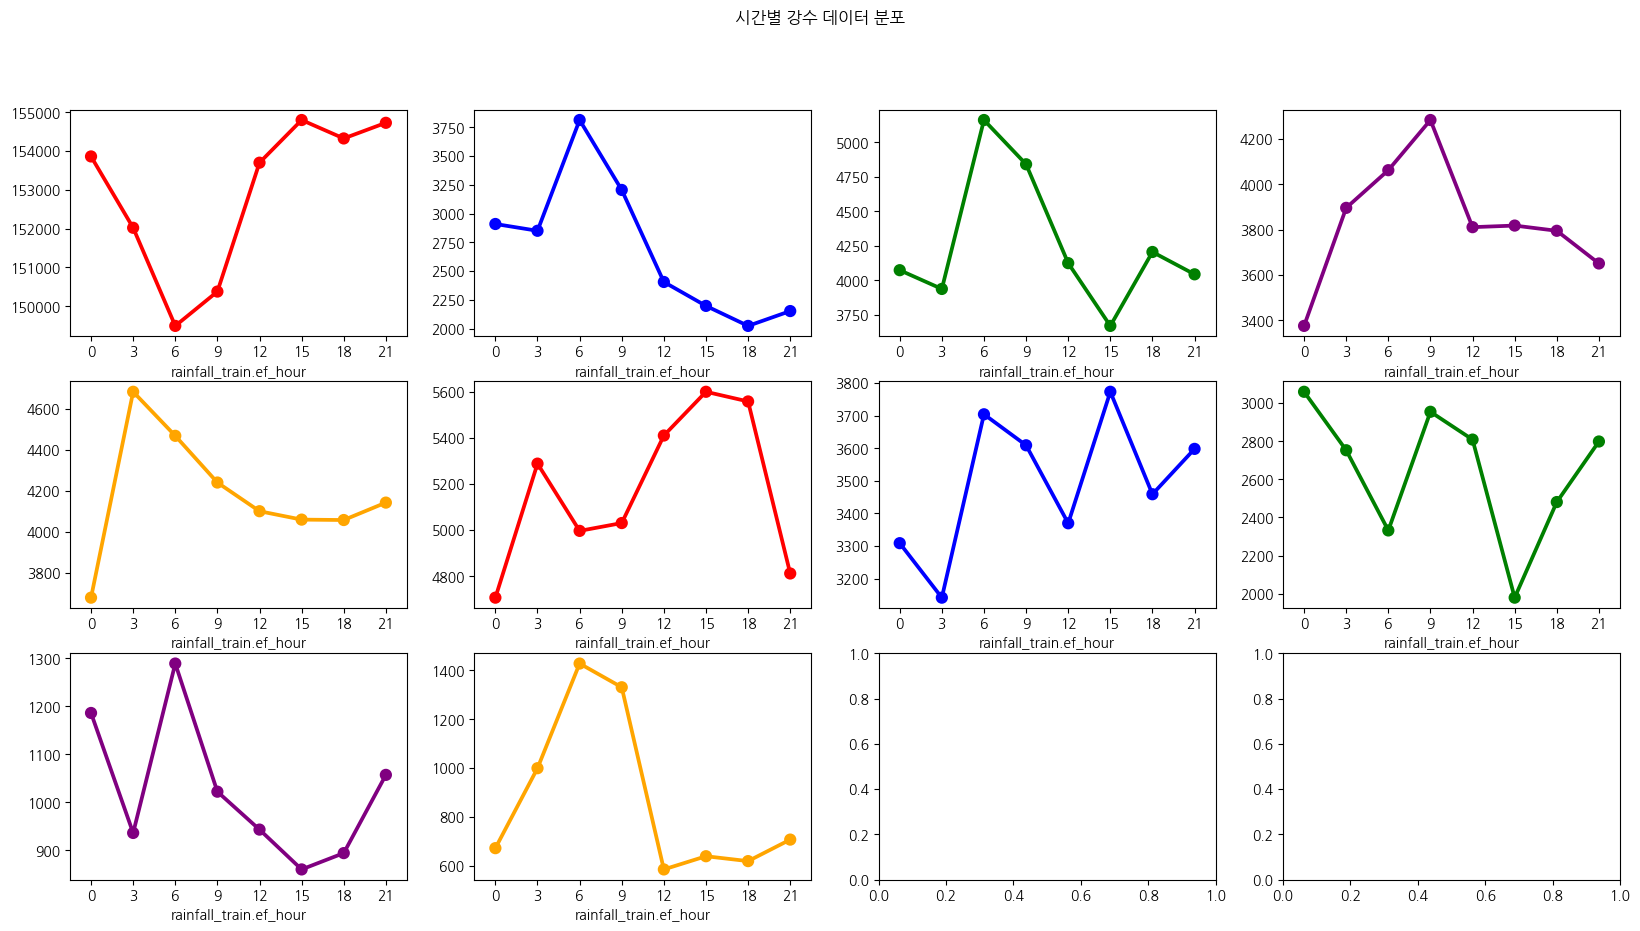

In [52]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_hour'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(tmp.index)
fig.suptitle("시간별 강수 데이터 분포")
tmp.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64', name='rainfall_train.ef_day')

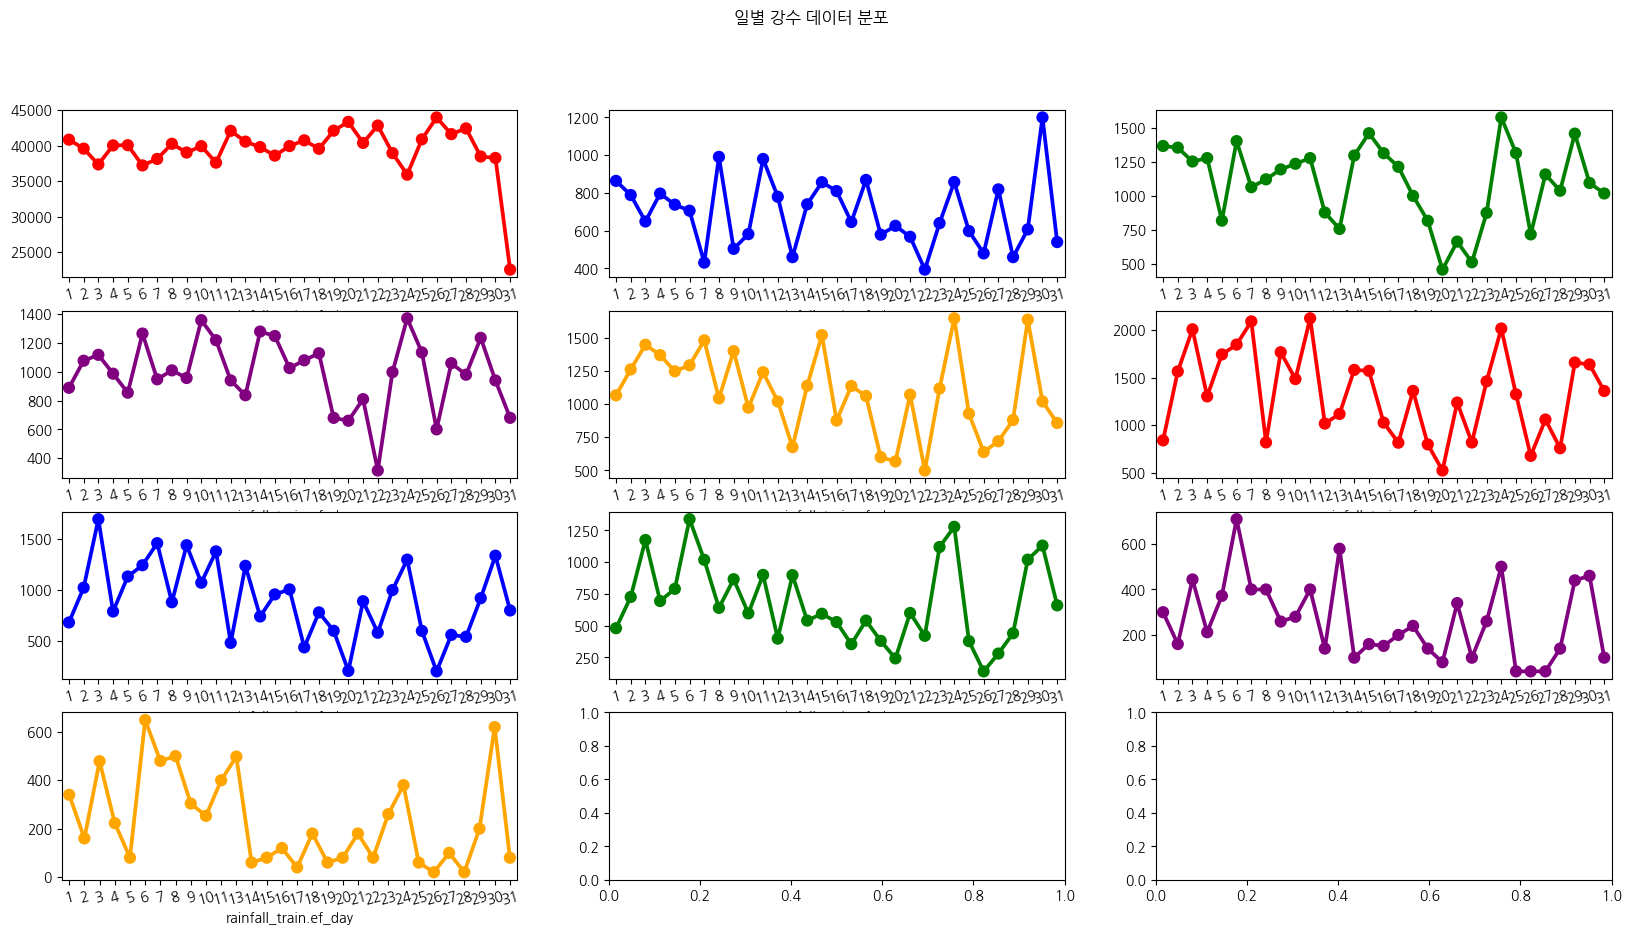

In [53]:
import numpy as np

fig, axes = plt.subplots(4,3, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_day'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//3,i%3], color=color)
    axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
fig.suptitle("일별 강수 데이터 분포")
tmp.index

## 지점 데이터 변수 확인

- test 데이터와 train 데이터에서 지점의 이름이 다른 것을 확인
- 지점별로 데이터가 바뀌지 않음을 확인해야 함.

In [55]:
import pandas as pd
df = pd.read_csv('./data/daegun_first.csv')

In [56]:
df=df[~(df['class'] == -999)]

In [57]:
df['year'] = df['TM_EF'].apply(lambda x: x[0])

/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Text(0.5, 0.98, '년도별 평균 실강수량 분포 가시화')

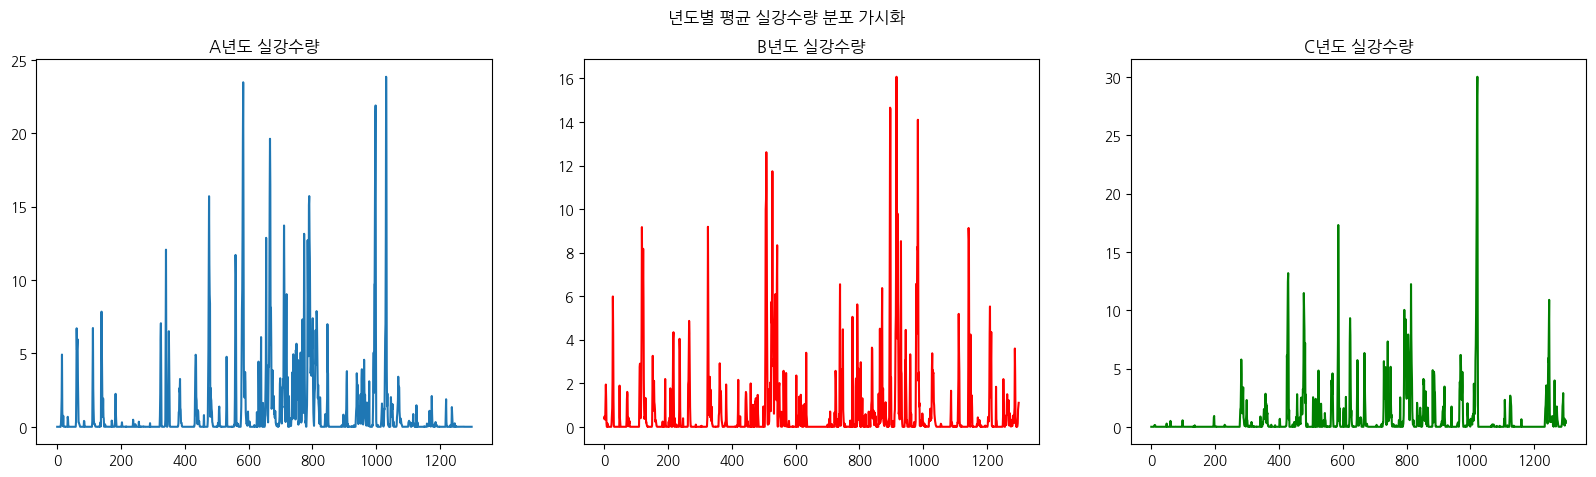

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = "NanumGothic"
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
A_df = df[df['year'] == 'A']
tmp =A_df.groupby(by=['TM_EF'])['VV'].mean().reset_index(drop=True)
sns.lineplot(x=tmp.index,y=tmp.values,ax=axes[0])
axes[0].set_title("A년도 실강수량")

B_df = df[df['year'] == 'B']
tmp =B_df.groupby(by=['TM_EF'])['VV'].mean().reset_index(drop=True)
sns.lineplot(x=tmp.index,y=tmp.values,ax=axes[1],color='red')
axes[1].set_title("B년도 실강수량")

C_df = df[df['year'] == 'C']
tmp =C_df.groupby(by=['TM_EF'])['VV'].mean().reset_index(drop=True)
sns.lineplot(x=tmp.index,y=tmp.values,ax=axes[2], color='green')
axes[2].set_title("C년도 실강수량")

fig.suptitle("년도별 평균 실강수량 분포 가시화")


In [59]:
tmp_df = df[(df["DH"] == 3) & (df["EF_class"] == 0)]["TM_EF"]

## 무강수 데이터 처리

/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'V0의 변화량에 따른 무강수 데이터의 분포')

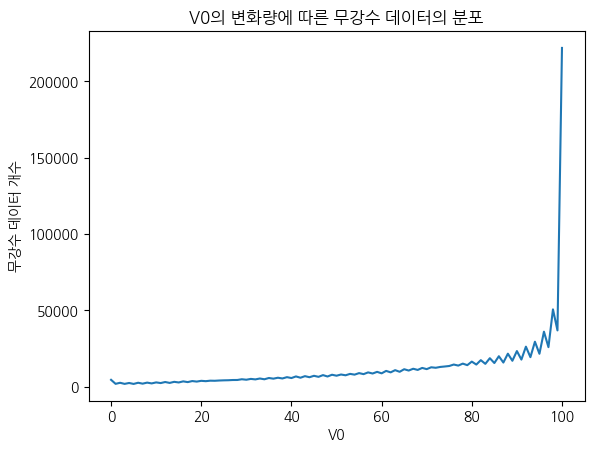

In [60]:
sns.lineplot(df[df['class'] == 0]['V0'].value_counts().sort_index())
plt.xlabel("V0")
plt.ylabel("무강수 데이터 개수")
plt.title("V0의 변화량에 따른 무강수 데이터의 분포")

In [61]:
print(f"전체 데이터         : {len(df)}")
print(f"무강수 100% 데이터  : {(df['V0'] == 100).sum()}")
print(f"무강수 100% 비율    : {(df['V0'] == 100).sum()/len(df)}")


전체 데이터         : 1448762
무강수 100% 데이터  : 222544
무강수 100% 비율    : 0.15360977165331505


### 무강수 100% 중 실제 무강수/강수 데이터 분포


In [62]:
print(f"전체 데이터    : {len(df[df['V0'] == 100])}")
print(f"무강수 데이터  : {(df[df['V0'] == 100]['class'] == 0).sum()}")
print(f"무강수 비율    : {(df[df['V0'] == 100]['class'] == 0).sum() / len(df[df['V0'] == 100])}")
# (df[df['V0'] == 100]['class'] == 0).sum() / len(df[df['V0'] == 100])

전체 데이터    : 222544
무강수 데이터  : 221909
무강수 비율    : 0.9971466316773312


/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'V0를 임계값으로 무강수/강수를 판단할 때 precision 가시화')

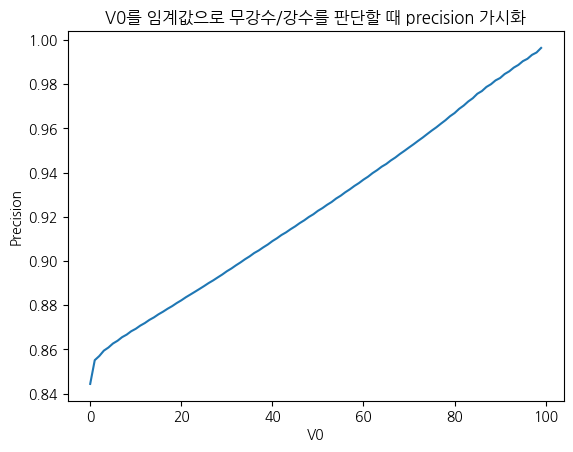

In [63]:
import numpy as np
# V0를 임계값으로 무강수/강수를 판단할 때 precision 가시화
y = []
for i in np.arange(100):
    y.append((df[df['V0'] >= i]['class'] == 0).sum()/len(df[df['V0'] >= i]))
sns.lineplot(x=np.arange(100),y=np.array(y))
plt.ylabel("Precision")
plt.xlabel("V0")
plt.title("V0를 임계값으로 무강수/강수를 판단할 때 precision 가시화")

## LSTM을 위한 데이터 분석

- 시계열적으로 데이터를 분석하기 위해서 몇가지 변수를 집계할 필요가 있다.
    - STN, DH(TM_FC)
- STN이 같은 데이터에 한해서 DH의 변수량이 실제 데이터에 주는 영향도를 분석할 필요가 있다.
    - DH가 3인 데이터에 한해서 나머지 변수들로 실제 강수량을 맞추는 회귀 분석을 통하여 DH를 제외한 각 변수의 영향도 파악
    - 위의 모델과 DH가 다른 데이터들을 통해서, DH 영향도 파악

In [64]:
df.groupby('TM_EF').nunique()

,TM_FC,DH,VV,STN,V1,V2,V3,V4,V5,V6,V7,V8,V9,class,V0,EF_class,year
TM_EF,,,,,,,,,,,,,,,,,
A년05월01일12시,1,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1,1
A년05월01일15시,1,1,1,20,2,1,1,1,1,1,1,1,1,1,2,1,1
A년05월01일18시,1,1,1,20,2,2,1,1,1,1,1,1,1,1,2,1,1
A년05월01일21시,1,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1,1
A년05월02일00시,2,2,1,20,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C년10월10일09시,2,2,7,20,8,12,9,7,7,3,3,1,1,5,21,1,1
C년10월10일12시,1,1,4,20,9,10,8,6,4,2,2,1,1,4,12,1,1
C년10월10일15시,1,1,7,19,9,9,8,6,4,2,2,1,1,4,12,1,1


>   모델 결정을 위한 시각적 분석

### simple 데이터 분석

In [3]:
import pandas as pd

train_file_path = './data/rainfall_train.csv'

from util import preprocessing_simple_train, make_day2class, month_to_day

train_df = preprocessing_simple_train()
train_df['day'] = month_to_day(train_df['rainfall_train.ef_month']) + train_df['rainfall_train.ef_day']

tmp_df = pd.read_csv(train_file_path).drop(columns=['Unnamed: 0'])
tmp_df['day'] = month_to_day(tmp_df['rainfall_train.ef_month']) + tmp_df['rainfall_train.ef_day']


#### 각 지점별 클래스 label 확인

In [46]:
from util import make_mean
import matplotlib.pyplot as plt
import seaborn as sns

tmp = make_mean(train_df,15)





<Axes: xlabel='rainfall_train.stn4contest', ylabel='v_median'>

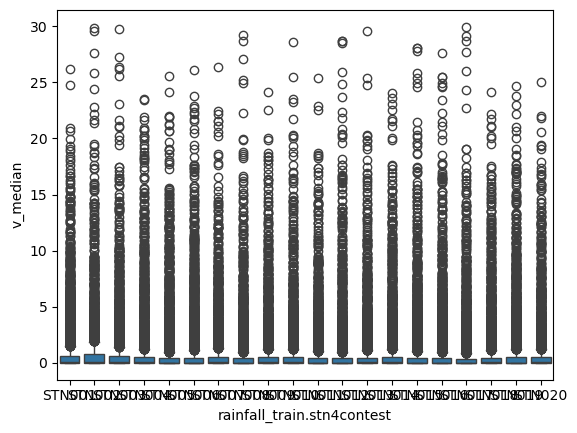

In [32]:
sns.boxplot(x='rainfall_train.stn4contest',y='v_median',data=tmp)

> 3

<Axes: xlabel='rainfall_train.stn4contest', ylabel='mean_vmedian'>

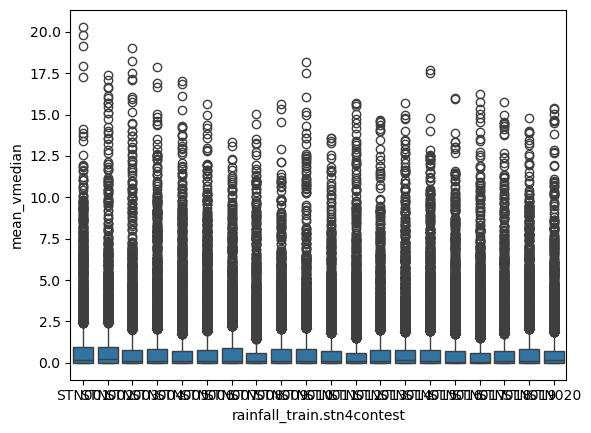

In [28]:
sns.boxplot(x='rainfall_train.stn4contest',y='mean_vmedian',data=tmp)


>  5

<Axes: xlabel='rainfall_train.stn4contest', ylabel='mean_vmedian'>

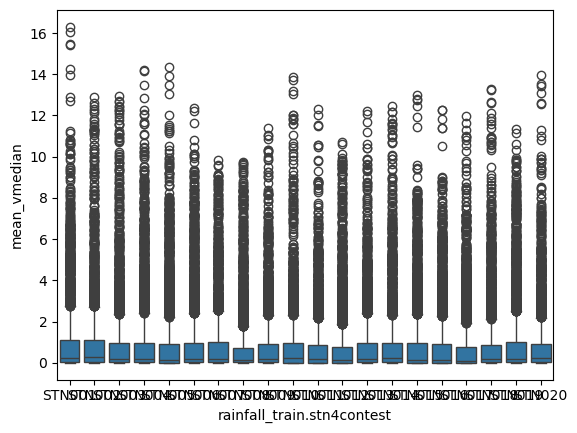

In [30]:
sns.boxplot(x='rainfall_train.stn4contest',y='mean_vmedian',data=tmp)


>   10

<Axes: xlabel='rainfall_train.stn4contest', ylabel='mean_vmedian'>

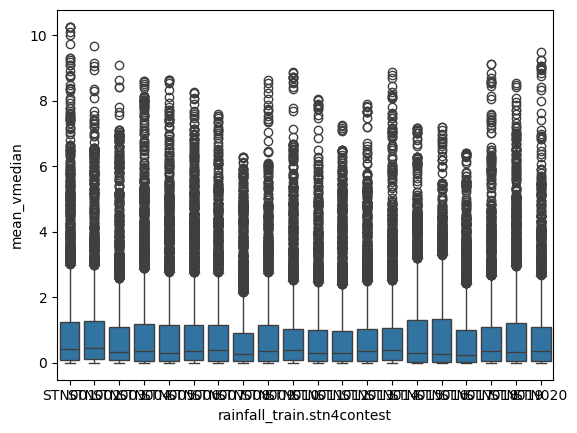

In [34]:
sns.boxplot(x='rainfall_train.stn4contest',y='mean_vmedian',data=tmp)

>   15

<Axes: xlabel='day', ylabel='mean_vmedian'>

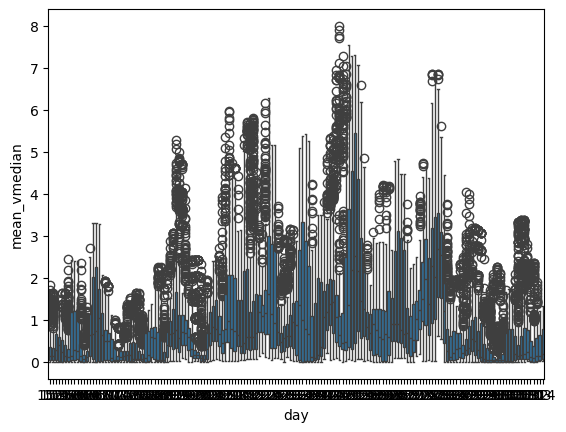

In [47]:
sns.boxplot(x='day',y='mean_vmedian',data=tmp)

> 30

<Axes: xlabel='day', ylabel='mean_vmedian'>

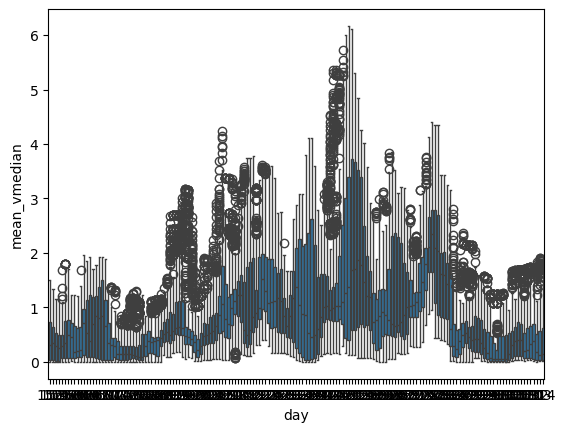

In [45]:
sns.boxplot(x='day',y='mean_vmedian',data=tmp)

>60

<Axes: xlabel='day', ylabel='mean_vmedian'>

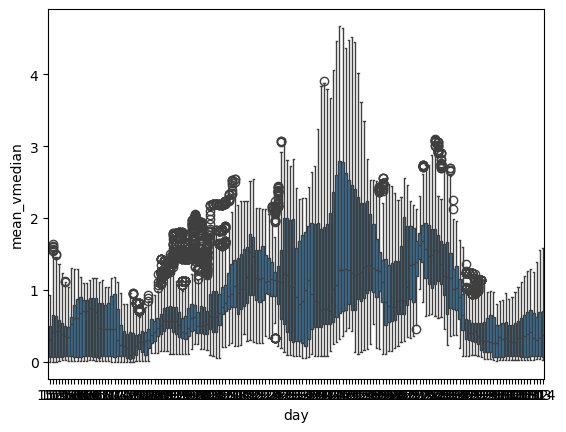

In [43]:
sns.boxplot(x='day',y='mean_vmedian',data=tmp)


### 일자별로 강수계급 데이터 분석

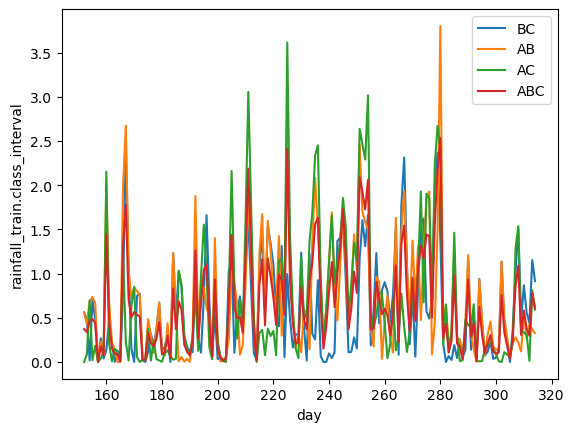

In [3]:

import matplotlib.pyplot as plt 
import seaborn as sns
BC = train_df[train_df['rainfall_train.ef_year'] != 'A']
AC = train_df[train_df['rainfall_train.ef_year'] != 'B']
AB = train_df[train_df['rainfall_train.ef_year'] != 'C']

t_BC = tmp_df[tmp_df['rainfall_train.ef_year'] != 'A']
t_AC = tmp_df[tmp_df['rainfall_train.ef_year'] != 'B']
t_AB = tmp_df[tmp_df['rainfall_train.ef_year'] != 'C']


BC_data = make_day2class(BC)
AB_data = make_day2class(AB)
AC_data = make_day2class(AC)
ABC_data = make_day2class(train_df)
t_BC_data = make_day2class(t_BC)
t_AB_data = make_day2class(t_AB)
t_AC_data = make_day2class(t_AC)
t_ABC_data = make_day2class(tmp_df)


sns.lineplot(x=BC_data['day'],y=BC_data['rainfall_train.class_interval'],label='BC')
sns.lineplot(x=AB_data['day'],y=AB_data['rainfall_train.class_interval'],label='AB')
sns.lineplot(x=AC_data['day'],y=AC_data['rainfall_train.class_interval'],label='AC')
sns.lineplot(x=ABC_data['day'],y=ABC_data['rainfall_train.class_interval'],label='ABC')

# sns.kdeplot(x=BC_data['rainfall_train.class_interval'],label='BC')
# sns.kdeplot(x=AB_data['rainfall_train.class_interval'],label='AB')
# sns.kdeplot(x=AC_data['rainfall_train.class_interval'],label='AC')
# sns.kdeplot(x=ABC_data['rainfall_train.class_interval'],label='ABC')
# sns.kdeplot(x=t_BC_data['rainfall_train.class_interval'],label='t_BC')
# sns.kdeplot(x=t_AB_data['rainfall_train.class_interval'],label='t_AB')
# sns.kdeplot(x=t_AC_data['rainfall_train.class_interval'],label='t_AC')
# sns.kdeplot(x=t_ABC_data['rainfall_train.class_interval'],label='t_ABC')
plt.legend()

## 테스트 데이터 분석


In [69]:
from util import preprocessing_simple_test, preprocessing_simple_train


test_df = preprocessing_simple_test()
train_df = preprocessing_simple_train()


In [70]:
from util import month_to_day

test_df['day'] = month_to_day(test_df['rainfall_test.ef_month']) + test_df['rainfall_test.ef_day']
train_df['day'] = month_to_day(train_df['rainfall_train.ef_month']) + train_df['rainfall_train.ef_day']


In [71]:
train_df = train_df[train_df['rainfall_train.class_interval'] != 0]
test_df = test_df[test_df['rainfall_test.class_interval'] != 0]


In [72]:
_A = train_df[train_df['rainfall_train.ef_year'] == 'A']
_B = train_df[train_df['rainfall_train.ef_year'] == 'B']
_C = train_df[train_df['rainfall_train.ef_year'] == 'C']

/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Axes: xlabel='rainfall_test.dh_x', ylabel='count'>

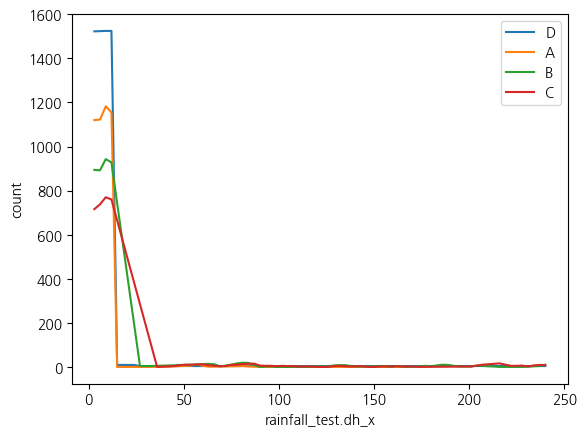

In [73]:
import seaborn as sns 

dhpvalueD= test_df.groupby(by=['rainfall_test.stn4contest', 'rainfall_test.ef_year',
       'rainfall_test.ef_month', 'rainfall_test.ef_day',
       'rainfall_test.ef_hour'])['rainfall_test.dh_x'].min().reset_index(drop=True).value_counts()
dhpvalueA= _A.groupby(by=['rainfall_train.stn4contest', 'rainfall_train.ef_year',
       'rainfall_train.ef_month', 'rainfall_train.ef_day',
       'rainfall_train.ef_hour'])['rainfall_train.dh_x'].min().reset_index(drop=True).value_counts()
dhpvalueB= _B.groupby(by=['rainfall_train.stn4contest', 'rainfall_train.ef_year',
       'rainfall_train.ef_month', 'rainfall_train.ef_day',
       'rainfall_train.ef_hour'])['rainfall_train.dh_x'].min().reset_index(drop=True).value_counts()
dhpvalueC= _C.groupby(by=['rainfall_train.stn4contest', 'rainfall_train.ef_year',
       'rainfall_train.ef_month', 'rainfall_train.ef_day',
       'rainfall_train.ef_hour'])['rainfall_train.dh_x'].min().reset_index(drop=True).value_counts()

sns.lineplot(dhpvalueD.sort_index(), label='D')
sns.lineplot(dhpvalueA.sort_index(), label='A')
sns.lineplot(dhpvalueB.sort_index(), label='B')
sns.lineplot(dhpvalueC.sort_index(), label='C')



/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

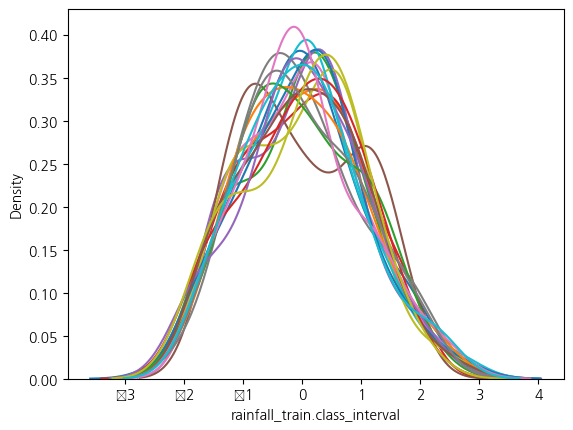

In [74]:
from util import make_day2class


for i in range(1,21):
    sns.kdeplot(make_day2class(_A[_A['rainfall_train.stn4contest'] == f'STN{format(i, "03")}'])['rainfall_train.class_interval'], label=f"STN{i}")

/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

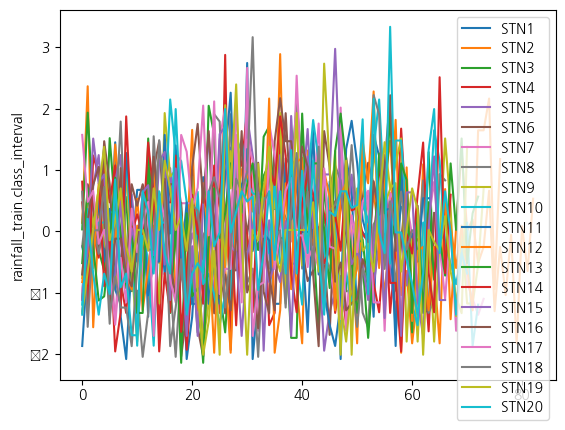

In [75]:
from util import make_day2class


for i in range(1,21):
    sns.lineplot(make_day2class(_B[_B['rainfall_train.stn4contest'] == f'STN{format(i, "03")}'])['rainfall_train.class_interval'], label=f"STN{i}")

/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

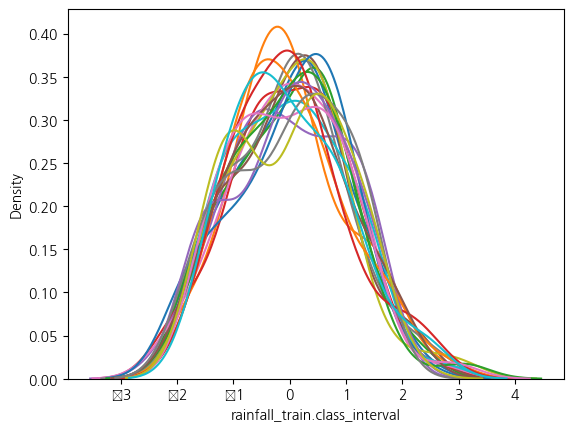

In [76]:
from util import make_day2class


for i in range(1,21):
    sns.kdeplot(make_day2class(_C[_C['rainfall_train.stn4contest'] == f'STN{format(i, "03")}'])['rainfall_train.class_interval'], label=f"STN{i}")

In [77]:
print(len(_A))
print(len(_B))
print(len(_C))


4630
3994
3362


/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/encore/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Axes: ylabel='rainfall_train.class_interval'>

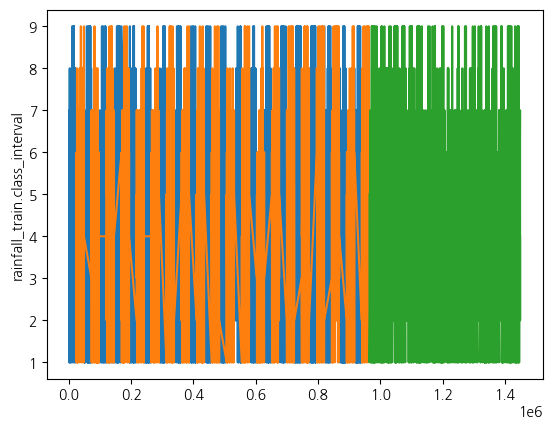

In [78]:
sns.lineplot(_A['rainfall_train.class_interval'])

sns.lineplot(_B['rainfall_train.class_interval'])
sns.lineplot(_C['rainfall_train.class_interval'])


